In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

1. What was the change in price of the stock overtime?
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple
Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-19,122.160004,124.709999,121.800003,124.660004,124.660004,47279700,AMAZON
2022-09-20,123.349998,124.400002,121.139999,122.190002,122.190002,47698400,AMAZON
2022-09-21,122.489998,123.760002,118.449997,118.540001,118.540001,58498900,AMAZON
2022-09-22,117.080002,118.790001,116.260002,117.309998,117.309998,55229200,AMAZON
2022-09-23,116.000000,116.050003,112.059998,113.779999,113.779999,65081200,AMAZON
2022-09-26,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,AMAZON
2022-09-27,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,AMAZON
2022-09-28,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMAZON
2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMAZON


In [6]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.855103,94639600,APPLE
2021-10-04,141.759995,142.210007,138.270004,139.139999,138.364670,98322000,APPLE
2021-10-05,139.490005,142.240005,139.360001,141.110001,140.323685,80861100,APPLE
2021-10-06,139.470001,142.149994,138.369995,142.000000,141.208740,83221100,APPLE
2021-10-07,143.059998,144.220001,142.720001,143.289993,142.491547,61732700,APPLE
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.103699,58773200,APPLE
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200,APPLE
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,APPLE
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700,APPLE


In [7]:
# Summary Stastics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.444881,160.528770,156.558968,158.629246,158.210154,8.927451e+07
std,12.448645,12.384053,12.356878,12.354733,12.281161,2.660912e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.847500,150.167496,147.584995,149.170006,148.503723,7.019855e+07
50%,159.580002,161.970001,156.625000,159.260002,158.877831,8.447425e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630116,1.017193e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [8]:
# General infomation
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-10-01 to 2022-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


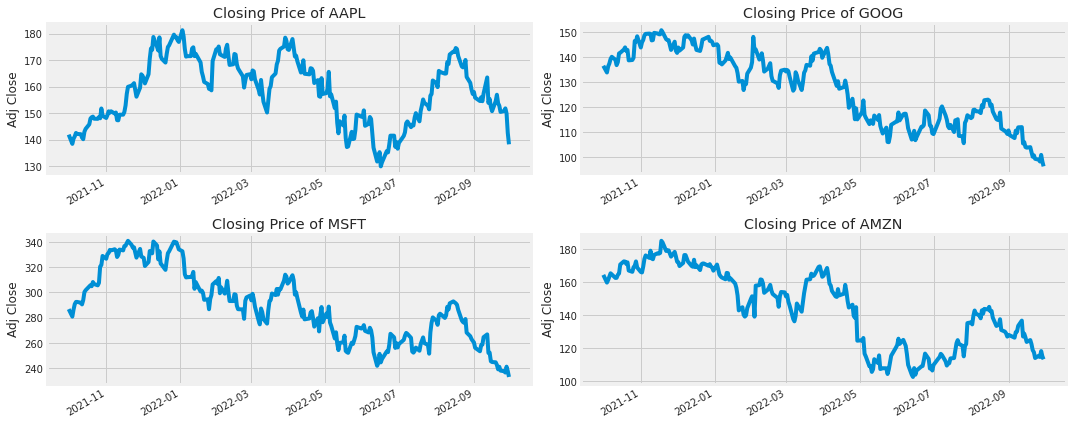

In [9]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

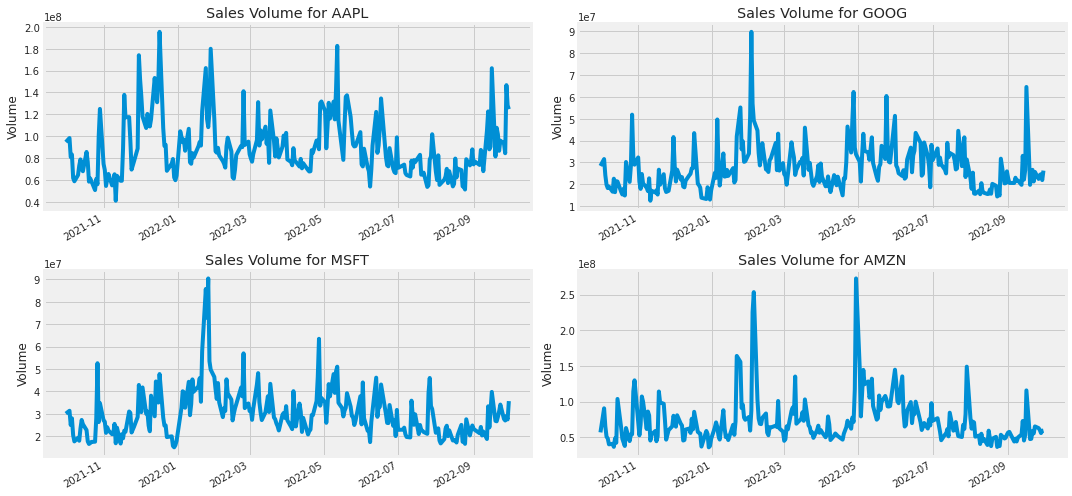

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

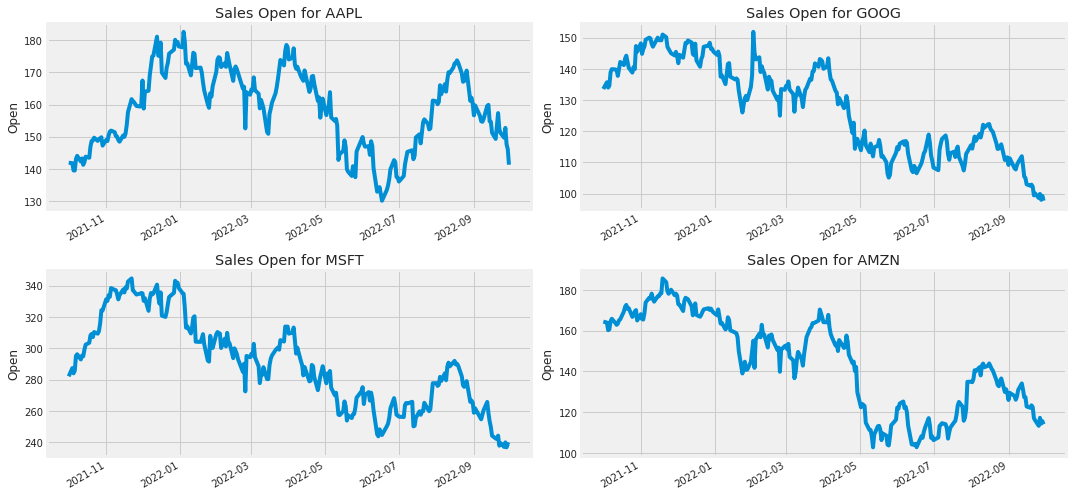

In [11]:
# Now let's plot the open of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Sales Open for {tech_list[i - 1]}")
    
plt.tight_layout()

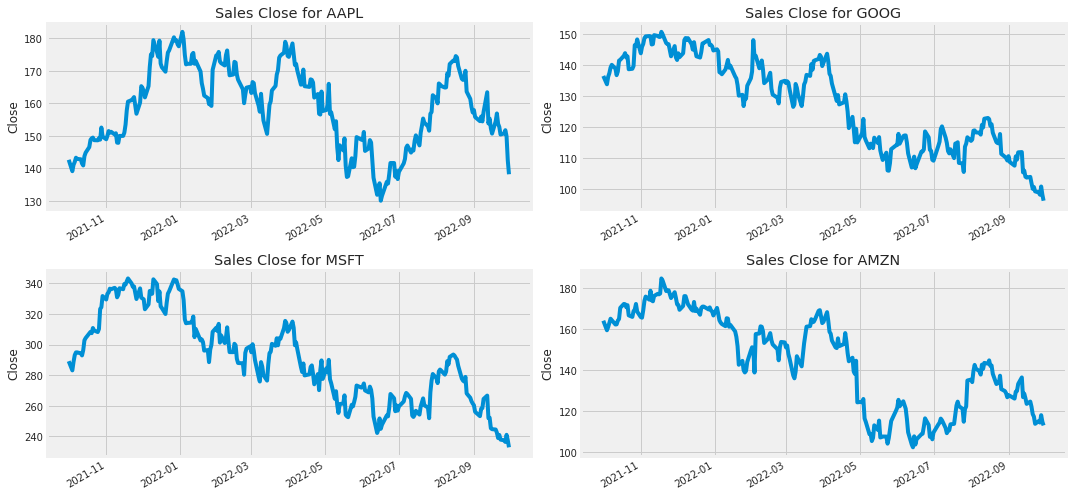

In [12]:
# Now let's plot the Close of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Sales Close for {tech_list[i - 1]}")
    
plt.tight_layout()



Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.


2. What was the moving average of the various stocks?

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


Now let's go ahead and plot all the additional Moving Averages

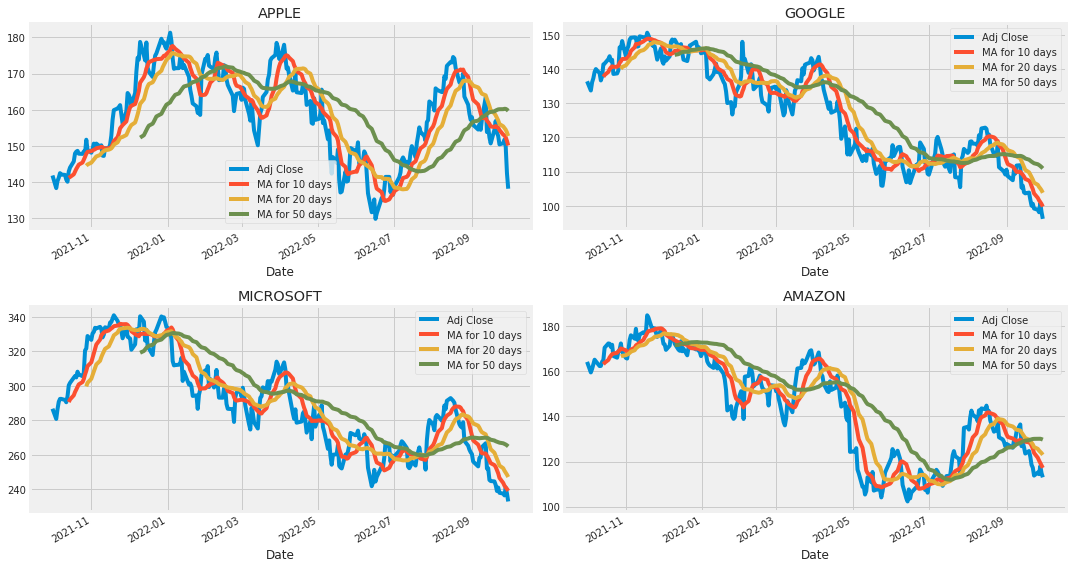

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.


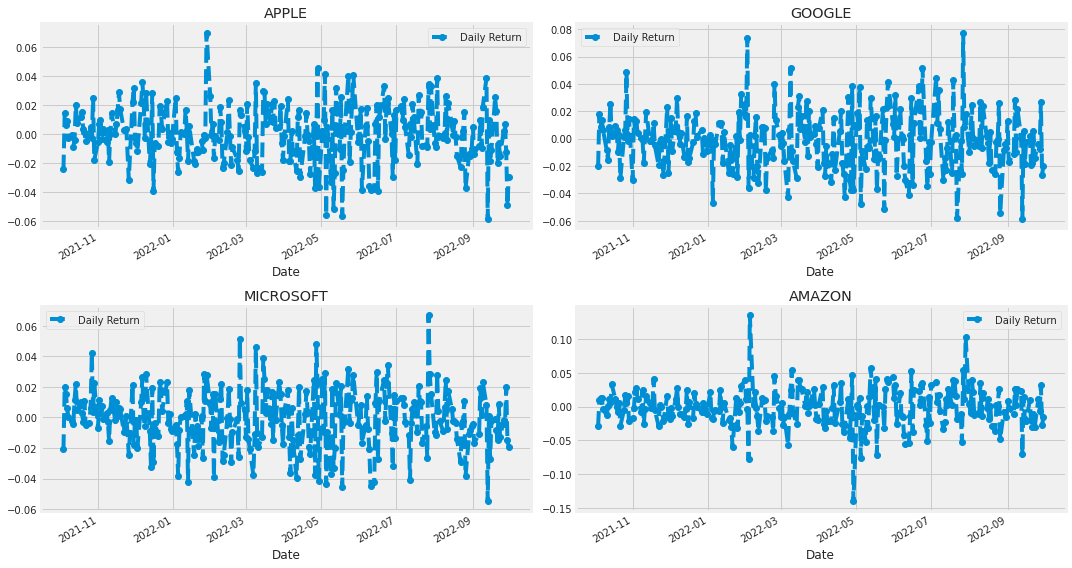

In [15]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.


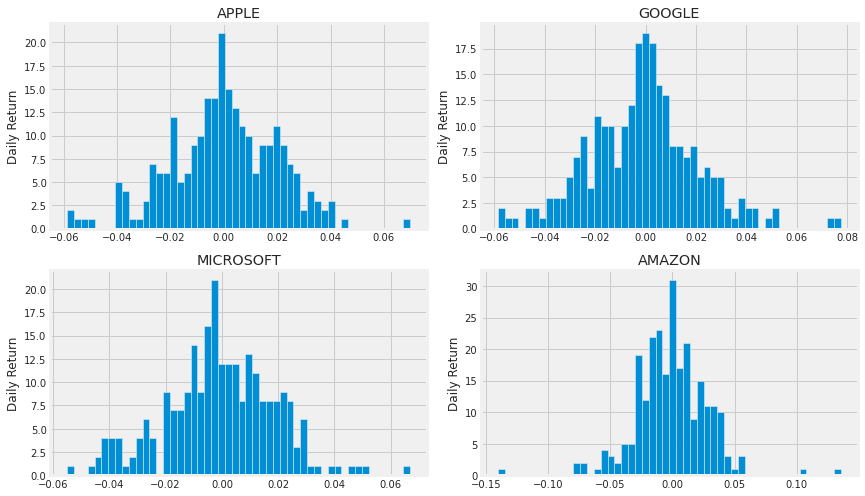

In [16]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()



4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 



Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-04,138.364655,133.764999,280.758606,159.488998
2021-10-05,140.323685,136.177002,286.361755,161.050003
2021-10-06,141.208740,137.354004,290.675537,163.100494
2021-10-07,142.491531,139.185501,292.401123,165.121506
2021-10-08,142.103699,140.056000,292.401123,164.431000


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.


In [18]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-04,NaN,NaN,NaN,NaN
2021-10-05,0.014158,0.018032,0.019957,0.009788
2021-10-06,0.006307,0.008643,0.015064,0.012732
2021-10-07,0.009084,0.013334,0.005936,0.012391
2021-10-08,-0.002722,0.006254,0.000000,-0.004182


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.


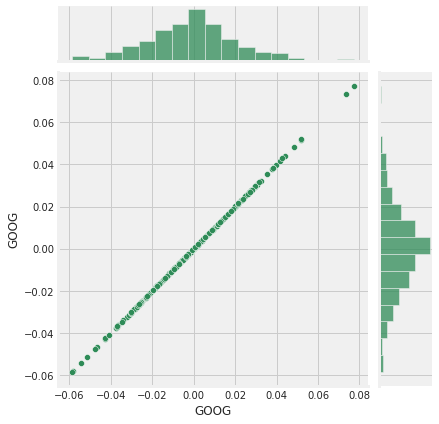

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

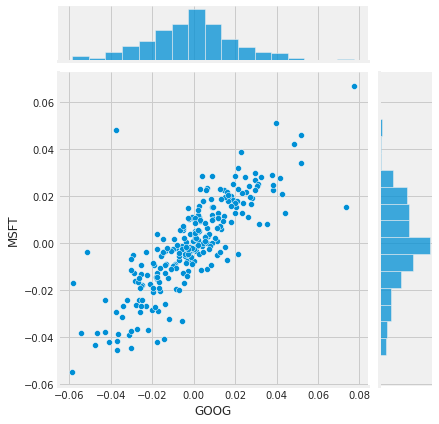

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot


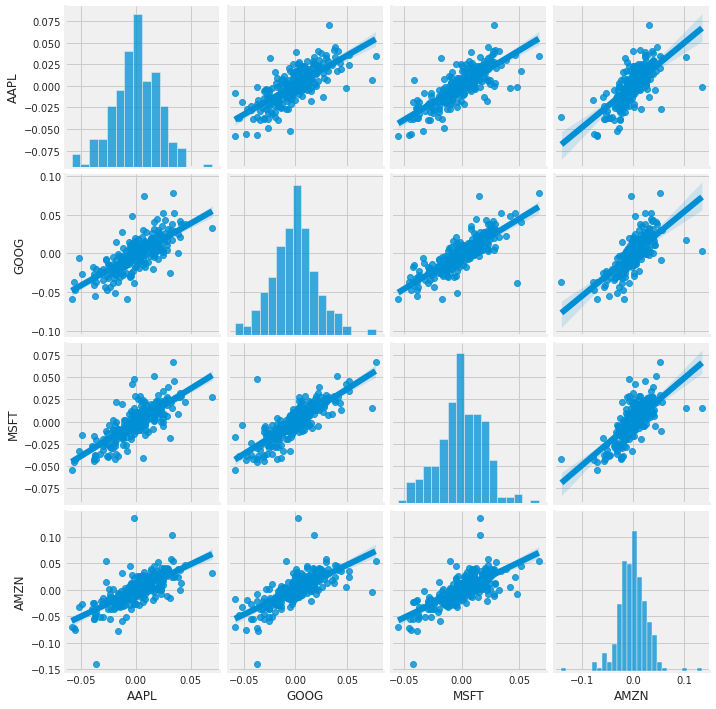

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.


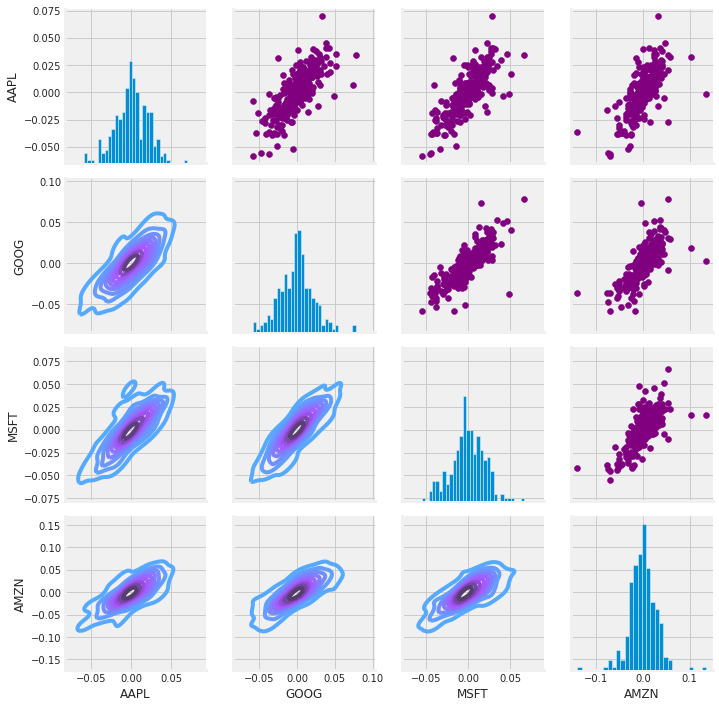

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

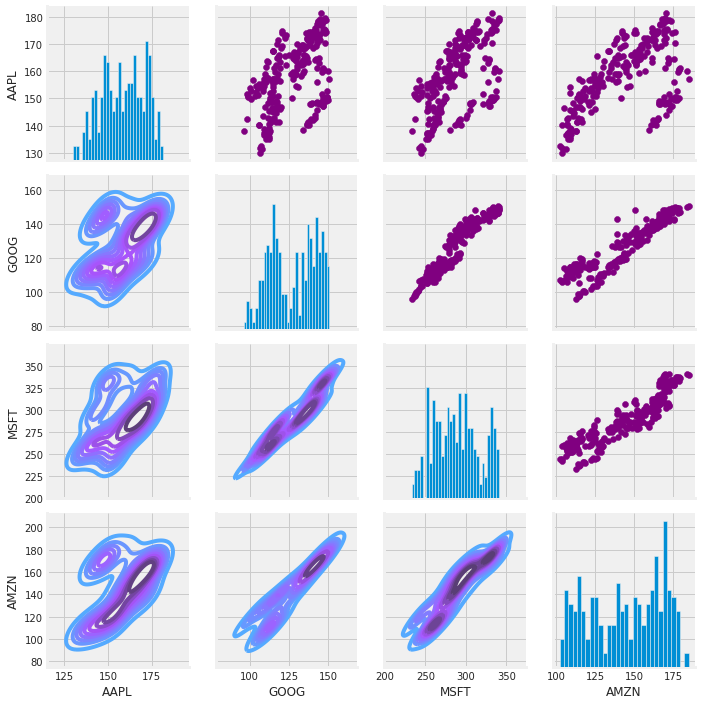

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

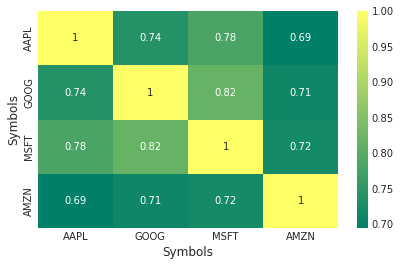

In [26]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

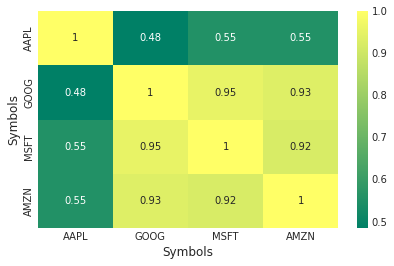

In [27]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.


5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


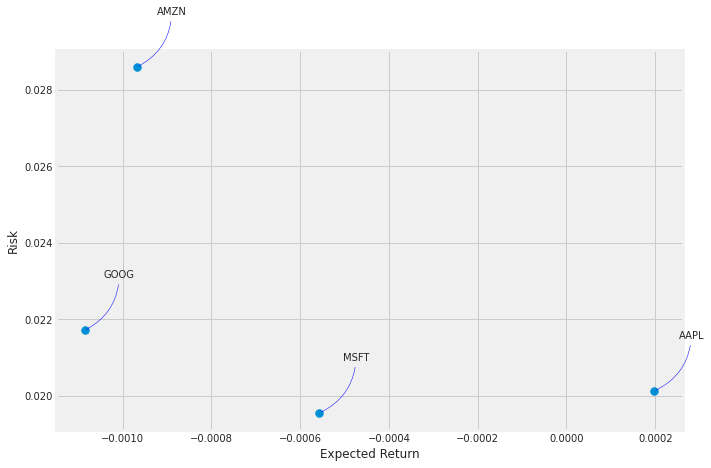

In [29]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

6. Predicting the closing price stock price of APPLE inc:

In [30]:
# Get the  of AAPL stock quote
dataframe = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show tech data
dataframe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540050
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996


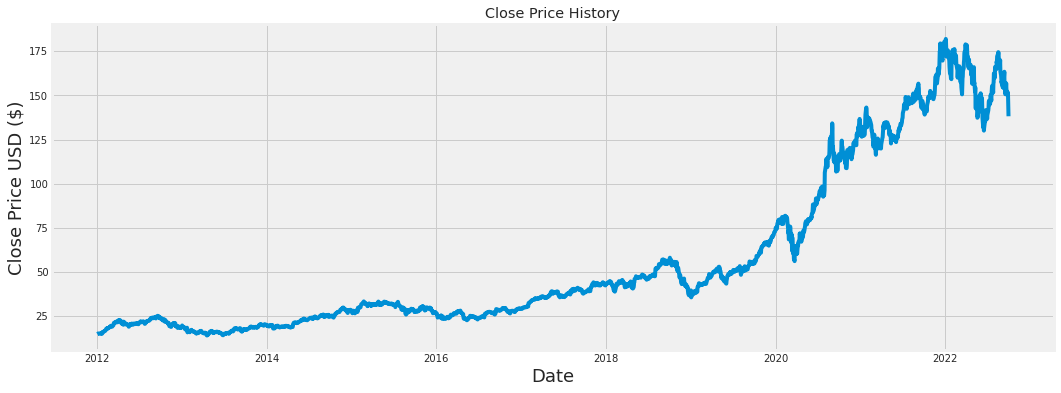

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dataframe['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the 'Close column 
data = dataframe.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2570

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80858312],
       [0.76478988],
       [0.73932317]])

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2022-10-02 23:24:15.583534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-02 23:24:15.583780: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-02 23:24:15.583970: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (muoki): /proc/driver/nvidia/version does not exist
2022-10-02 23:24:15.625150: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2510/2510 [==============================] - 201s 75ms/step - loss: 0.0016


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

25.557638824836932

/tmp/ipykernel_59076/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


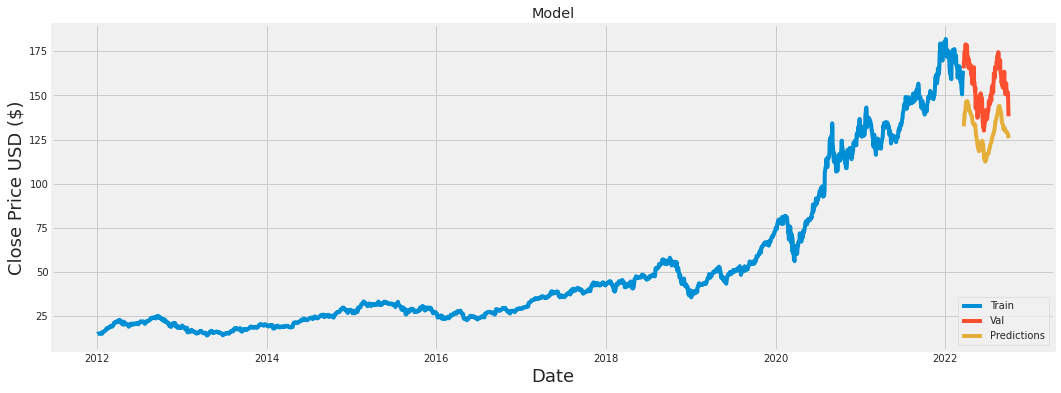

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-21,165.380005,132.453568
2022-03-22,168.820007,133.840607
2022-03-23,170.210007,135.582687
2022-03-24,174.070007,137.381226
2022-03-25,174.720001,139.416565
...,...,...
2022-09-26,150.770004,128.562912
2022-09-27,151.759995,127.995728
2022-09-28,149.839996,127.627869


7. Predicting the closing price stock price of MICROSOFT inc:

In [46]:
# Get the  of MSFT stock quote
google_dataframe = DataReader('MSFT', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show tech data
google_dataframe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.527197
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.033817
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.258978
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.604765
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.307226
...,...,...,...,...,...,...
2022-09-26,241.449997,236.899994,237.050003,237.449997,27694200.0,237.449997
2022-09-27,241.800003,234.500000,239.979996,236.410004,27018700.0,236.410004
2022-09-28,242.330002,234.729996,236.809998,241.070007,29029700.0,241.070007


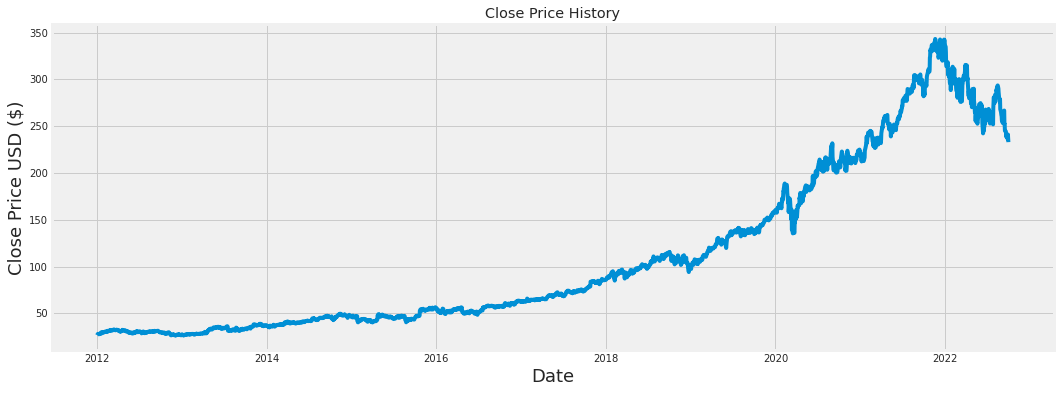

In [47]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(google_dataframe['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [48]:
# Create a new MSFT dataframe with only the 'Close column 
my_data = google_dataframe.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = my_data.values
# Get the number of rows to train the model on
training_data_length = int(np.ceil( len(dataset) * .95 ))

training_data_length

2570

In [49]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.67784308],
       [0.66657198],
       [0.65204901]])

In [50]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_length), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
msft_model = Sequential()
msft_model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
msft_model.add(LSTM(64, return_sequences=False))
msft_model.add(Dense(25))
msft_model.add(Dense(1))

# Compile the model
msft_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
msft_model.fit(x_train, y_train, batch_size=1, epochs=1)

2510/2510 [==============================] - 182s 70ms/step - loss: 0.0012


In [53]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_length - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = msft_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

13.647592104671208

/tmp/ipykernel_59076/523408972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


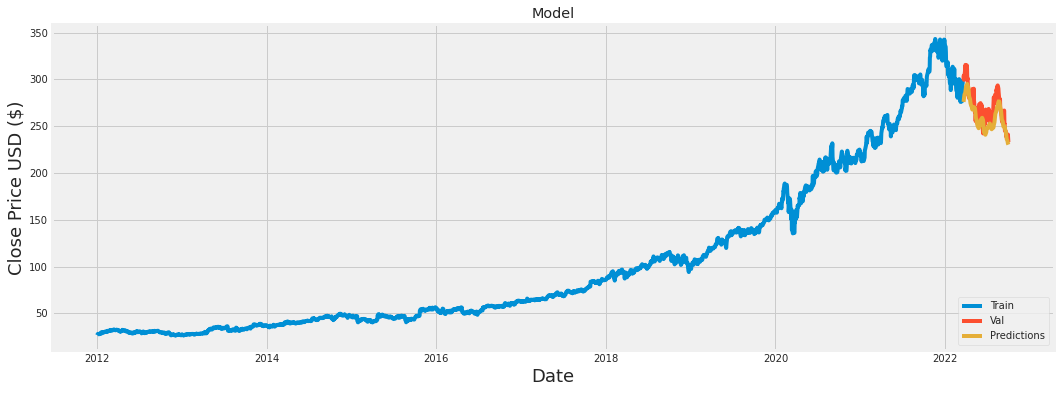

In [54]:
# Plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-21,299.160004,275.854401
2022-03-22,304.059998,278.017670
2022-03-23,299.489990,280.423950
2022-03-24,304.100006,282.145966
2022-03-25,303.679993,283.849487
...,...,...
2022-09-26,237.449997,234.310303
2022-09-27,236.410004,232.809143
2022-09-28,241.070007,231.458038
